In [1]:
import numpy as np
import struct
from array import array
from os.path import join

In [2]:
class MnistDataloader(object):
    def __init__(self, training_image_file_path, training_label_file_path, test_image_file_path, test_label_file_path):
        self.training_image_file_path = training_image_file_path
        self.training_label_file_path = training_label_file_path
        self.test_image_file_path = test_image_file_path
        self.test_label_file_path = test_label_file_path
    def readImagesLabel(self, image_filepath, label_filepath):
        labels = []
        with open(label_filepath, "rb") as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError("Magic Number mismatch, expected 2049, got {}".format(magic))
            labels = array("B",file.read())
        with open(image_filepath, "rb") as file:
            magic, size, rows, cols =struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError("Magic number mismatch, expected 2051, got {}".format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0]*rows*cols)
        for i in range(size):
            img = np.array(image_data[i*rows*cols:(i+1)*rows*cols])
            img = img.reshape(28, 28)
            images[i][:] = img
        return images, labels
    
    def loadData(self):
        X_train, y_train = self.readImagesLabel(self.training_image_file_path, self.training_label_file_path)
        X_test, y_test = self.readImagesLabel(self.test_image_file_path, self.test_label_file_path)
        return (X_train,y_train), (X_test, y_test)
            

In [3]:
import os
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
directory=os.getcwd()
print(directory)
training_image_file_path_a = directory+"\\train-images.idx3-ubyte"
training_label_file_path_a = directory+"\\train-labels.idx1-ubyte"
test_image_file_path_a = directory+"\\t10k-images.idx3-ubyte"
test_label_file_path_a = directory+"\\t10k-labels.idx1-ubyte"

C:\Users\ays\Desktop\ML


In [5]:
mnist_dataloader = MnistDataloader(training_image_file_path_a, training_label_file_path_a, test_image_file_path_a, test_label_file_path_a)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.loadData()

In [18]:
y_train

array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4

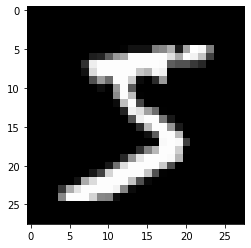

5

In [22]:
image_test = x_train[0]
fig = plt.figure
plt.imshow(image_test, cmap = "gray")
plt.show()
y_train[0]